
<br>

# this problem is from: tensorflow_documentation: 

## [prb_link](https://www.tensorflow.org/tutorials/keras/classification)

<br>

In [25]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [66]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.activations import relu
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

In [22]:
mnist_dataset = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = mnist_dataset.load_data()

print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train : (60000, 28, 28)
y_train : (60000,)
X_test : (10000, 28, 28)
y_test: (10000,)


In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

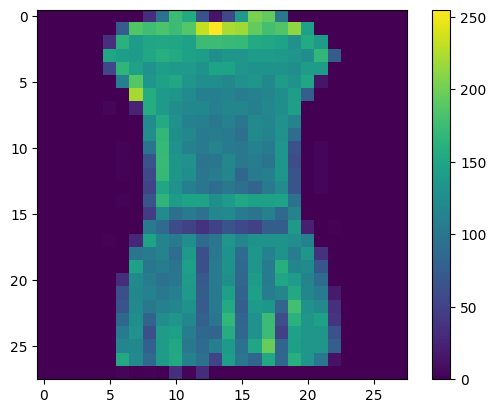

In [31]:
plt.imshow(X_train[3])
plt.colorbar()

# this image range pixel value range from (0,250) bt  pixel value consist of (0,255) so we need to scale the data 

In [32]:
X_train = X_train/255.0
X_test = X_test/255.0

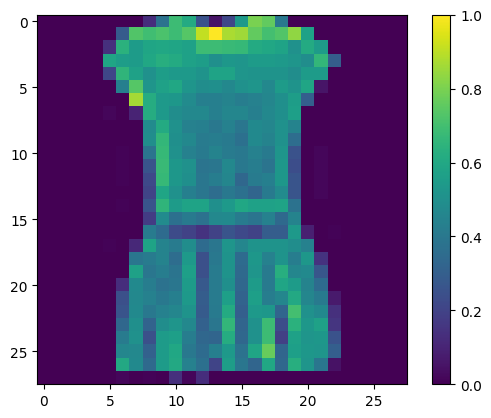

In [37]:
plt.imshow(X_train[3])
plt.colorbar()


In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

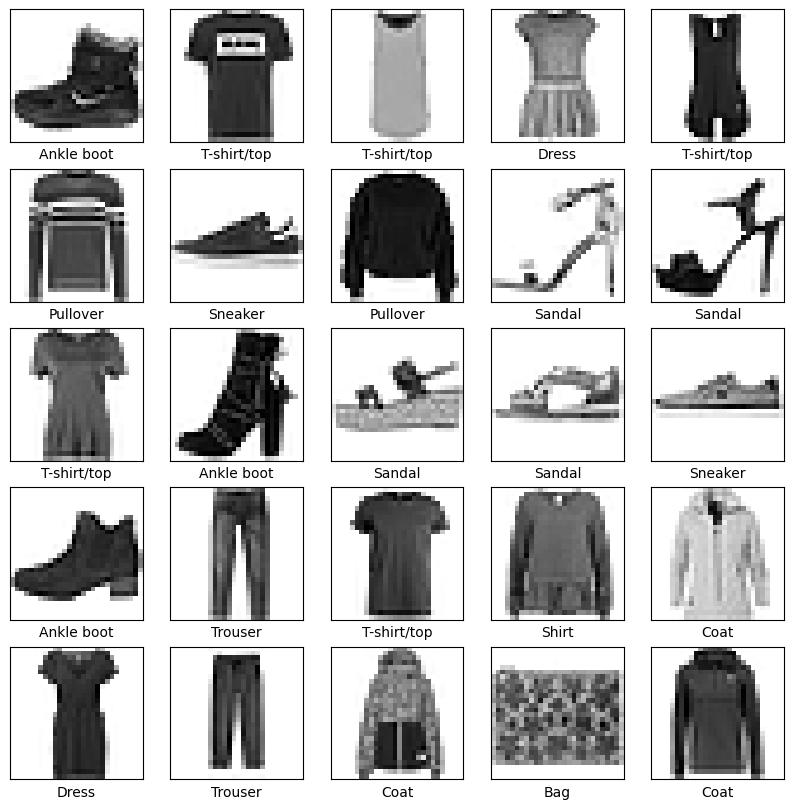

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [55]:
model = Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128,activation=relu))
model.add(Dense(10))

/home/yasin/allProgram/100DaysDL/tensorflow_documentation/venvML/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [70]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
  12/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8624 - loss: 0.3233   

2024-06-07 22:35:51.669474: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8981 - loss: 0.2765
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9030 - loss: 0.2602
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9095 - loss: 0.2457
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9082 - loss: 0.2481
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9158 - loss: 0.2274
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9151 - loss: 0.2265
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9189 - loss: 0.2154
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9193 - loss: 0.2171
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9241 - loss: 0.2045
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2009


In [80]:
test_loss, test_accu = model.evaluate(X_test,y_test,verbose=0) # verbose = 0 no traning output show

test_accu*100

88.77000212669373

In [81]:
predic = model.predict(X_test) # predic for all image:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [82]:
# see the first image:
predic[0]

array([-24.369587 , -24.142735 , -25.880976 , -28.683413 , -24.544943 ,
        -4.665061 , -27.456097 ,  -1.8008478, -17.45027  ,   2.7178965],
      dtype=float32)

In [84]:
np.argmax(predic[0]) # give me the heigest index value

9

In [86]:
y_train[0] # see what we have in our train data 

9

<br>

### define function for prediction : 

<br>

In [118]:
def plot_image(i,predictions_array,true_table,img):
    true_label, img = true_table[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label  = np.argmax(predictions_array)
    if predicted_label==true_label:
        color = "blue"
    else: 
        color = "red"
    plt.xlabel(f" Prediction: {class_names[predicted_label]} \n Result: {class_names[true_label]}")
    
    
def plot_value_array(i,prediction_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks([1,2,3,4,5,6,7,8,9])
    plt.yticks([])
    thisplot = plt.bar(range(10),prediction_array)
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

    

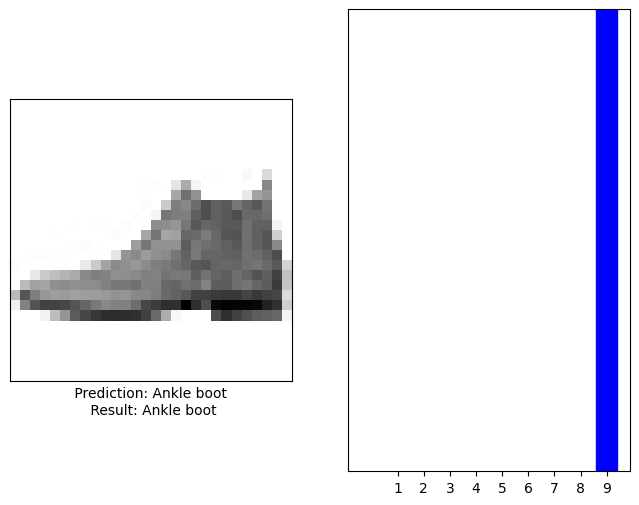

In [119]:
i = 0 
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_image(i,predic[i],y_train,X_test)
plt.subplot(1,2,2)
plot_value_array(i,predic[i],y_train)



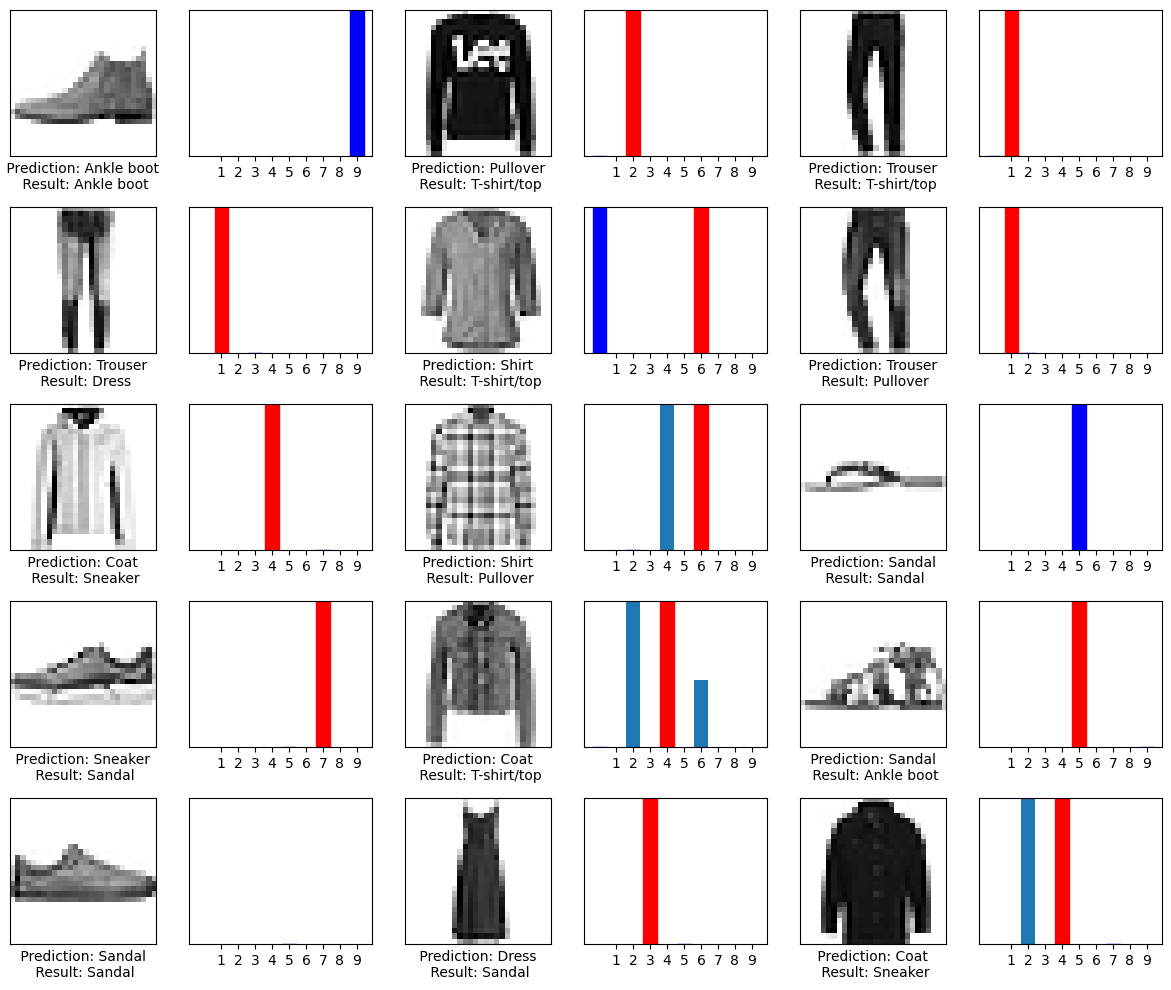

In [121]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predic[i], y_train, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predic[i], y_train)
plt.tight_layout()
plt.show()